In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Esercizio 6.1

In questo esercizio vogliamo migliorare un codice fornitoci per studiare il $\textit{Modello di Ising}$, i.e. un modello sviluppato negli anni '20 da  E. Ising e da W. Lenz che descrive il comportamento di un magnete in meccanica statistica.
Prima di procedere con le caratteristiche dell'esercizio è forse utile ricordare alcuni aspetti generali del modello e degli algoritmi che utilizzeremo nel corso dell'esercizio.



Il modello di Ising prevede dunque di poter studiare importanti proprietà termodinamiche di un ferromagnete a partire da un reticolo d-dimensionale di particelle dotate di spin. Le possibili configurazioni dello spin potranno essere up e down.
In una dimensione questo modello è anaticamente risolubile a partire dall'hamiltoniana:
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
dove per semplcità stiamo assumendo $\mu_B=1$ e $k_B=1$. I due termini descrivono l'interazione tra spin $s_i$ e l'azione di un campo esterno $h$ sul sistema. $J$ è detta "exchange interaction", ha le dimensioni di un'energia e descrive per l'appunto l'energia di interazione tra spin primi vicini.

$\textbf{oss}$: il reticolo che utilizzeremo presenterà ovviamente condizioni periodiche al bordo.

L'esercizio ci richiede che il nostro codice sia in grado di calcolare, oltre all'energia interna: la capacità termica $C(N,T)$, la suscettività magnetica $\chi(N,T)$ e la magnetizzazione $M(N,T,h)$; nello specifico riporteremo le seguenti grandezze nelle seguenti condizioni:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

dove il sistema è composto da $N=50$ spin e $J=1$. Per il valore del campo esterno $h$ esso verrà inserito nel file di input; solo nel caso della magnetizzazione dovremo usarne un valore diverso da zero, pertanto ho realizzato i grafici separatamente, modificando il file di input. L'algoritmo è impostato per salvare automaticamente solo la magnetizzazione nel caso di $h \neq 0$, per rendere la gestione dei file di output più semplice.


Richiede inoltre che si implementino due modi per estrarre il peso di Boltzmann $p(\{ s_i \}) = \exp(-\beta H)/Z$, ovvero:
- L'algoritmo di Metropolis 
- L'algoritmo di Gibbs

Il primo, di cui è stata fornita già una spiegazione nell'esperienza precedente, occorre però contestualizzare un attimo. La probabilità di trovare il sistema in un determinato stato $\{s_i\}$ che è data dalla:

$$p(\{ s_i \}) =\frac{ \exp(-\beta E_{\{s_i\}})}{Z}$$.

La funzione di partizione $Z$ però è definita come:

$$ Z = \sum_j \exp(-\beta E_j)$$

pertanto prevede la somma su tutte le possibili configurazioni del sistema; ciò per sistemi con molte particelle può essere particolarmente difficile da effettuare in termini computazionali. Non dobbiamo però dimenticare che la probabilità di accettanza dell'algoritmo di metropolis è definita dal rapporto tra le probabilità in due punti differenti, pertanto questo porta la funzione di partizione ad elidersi ($Z$ dipende ovviamente solo dal sistema, non dalla singola configurazione).
Ciò ci permette di utilizzare l'algoritmo semplicemente utilizzando le differenze di energie tra i due punti.

Pertanto avremo:

$$A(\{s_i\}|\{s_j\})=min(1,\exp(-\beta (E_i-E_f))$$

e con questa probabilità decideremo quindi se accettare o meno la rotazione dello spin selezionato, dove si è indicato con $E_i$ l'energia del sistema data dalle configurazioni degli spin $\{s_i\}$ e analogamente per $E_f$.

L'algoritmo di Gibbs è simile all'algoritmo di Metropolis e può essere in effetti visto come un algoritmo siffatto con probabilità di accettazione uguale ad uno, ovvero la mossa proposta è sempre accettata. In sostanza quello che fa l'algoritmo è visitare ogni punto del sistema e muoverlo con una distribuzione di probabilità che dipende dai punti rimamenti del sistema ( si capisce il nome alternativo di heat-bath algorithm). Pertanto, applicando al Modello di Ising, quando uno spin $s_k$ è "visitato" dall'algoritmo, esso prenderà un valore indipendente dal suo valore attuale, ma funzione dei rimanenti spin del sistema ($s_j con j\neq k$).
Si usa quindi una distribuzione di probabilità del tipo:

$$t(s_k=\pm 1|\{s_{j \neq k} \})=\frac{1}{1+\exp{(\mp \beta \Delta E_{flip})}}$$

L'esercizio richiede di mostrare le curve al variare della temperatura per le grandezze termodinamiche desiderate per entrambi gli algoritmi e di confrontare con il risultato teorico. Mostriamo innanzitutto l'andamento delle grandezze all'aumentare degli step dell'algoritmo, tenendo la temperatura fissata.

### Equilibrazione

Vale la pena spendere alcune parole per descrivere la procedura di equilibrazione dell'algoritmo e alcune considerazioni. Innanzitutto ci proponiamo di fissare un criterio per determinare se il sistema sia o meno in equilibrio. è lecito pensare che si possa considerare in equilibrio un sistema in cui le osservabili da noi misurate siano pressochè stabili. Un criterio più preciso potrebbe definire: $\frac{\delta x}{x}<\epsilon_{th}$, con $\epsilon_{th}$ un certo valore di soglia sulle oscillazioni di una grandezza $x$, con $\delta x$ la variazione tra lo step n-esimo e il successivo ( o forse sarebbe sensato assumere la richiesta che questa grandezza non oscilli più del valore di soglia per una certa quantità di step). Nel nostro caso specifico è sicuramente più semplice basarsi su una disamina "ad occhio" dei grafici riportati.

Sembra sensato assumere che dopo una trentina di blocchi il sistema sia in equilibrio: siccome la consegna dell'esercizio prevede di confrontare i valori da noi ottenuti con il valore teorico in funzione della temperatura dovremo scegliere un determinato valore di quelli riportati. Ovviamente sceglieremo l'ultimo della catena di data- blocking, ovvero quello che contiene la media sul maggior numero possibile di blocchi.
Chiaramente è necessario escludere i primi blocchi dalla misura, altrimenti la media sarà realizzata anche sui valori del sistema non equilibrato.

#### Parametri
Il file di input gestisce il numero degli step e dei blocchi: abbiamo usato $n_{step}=10^4$ (per ogni blocco però! Il totale degli step risulta pertanto superiore alla richiesta) e un totale di $M=80$ blocchi, di cui i primi $N_{th}=30$ sono stati scartati dalla misurazione, come spiegato.

Riportiamo i grafici delle grandezze desiderate per una temperatura qualsiasi (es:$T=1$) per verificare che non vi siano problemi di sorta.

In [2]:
xem, en_m, en_m_err = np.loadtxt("ISING_1D/output_metro.ene.0", usecols=(0,2,3), unpack=True)
xeg, en_g, en_g_err = np.loadtxt("ISING_1D/output_gibbs.ene.0", usecols=(0,2,3), unpack=True)

xcm, cal_m, cal_m_err = np.loadtxt("ISING_1D/output_metro.Cal.0", usecols=(0,2,3), unpack=True)
xcg, cal_g, cal_g_err = np.loadtxt("ISING_1D/output_gibbs.Cal.0", usecols=(0,2,3), unpack=True)

xmm, m_m, m_m_err = np.loadtxt("ISING_1D/output_metro.Magn.0", usecols=(0,2,3), unpack=True)
xmg, m_g, m_g_err = np.loadtxt("ISING_1D/output_gibbs.Magn.0", usecols=(0,2,3), unpack=True)

xxm, x_m, x_m_err = np.loadtxt("ISING_1D/output_metro.Susx.0", usecols=(0,2,3), unpack=True)
xxg, x_g, x_g_err = np.loadtxt("ISING_1D/output_gibbs.Susx.0", usecols=(0,2,3), unpack=True)

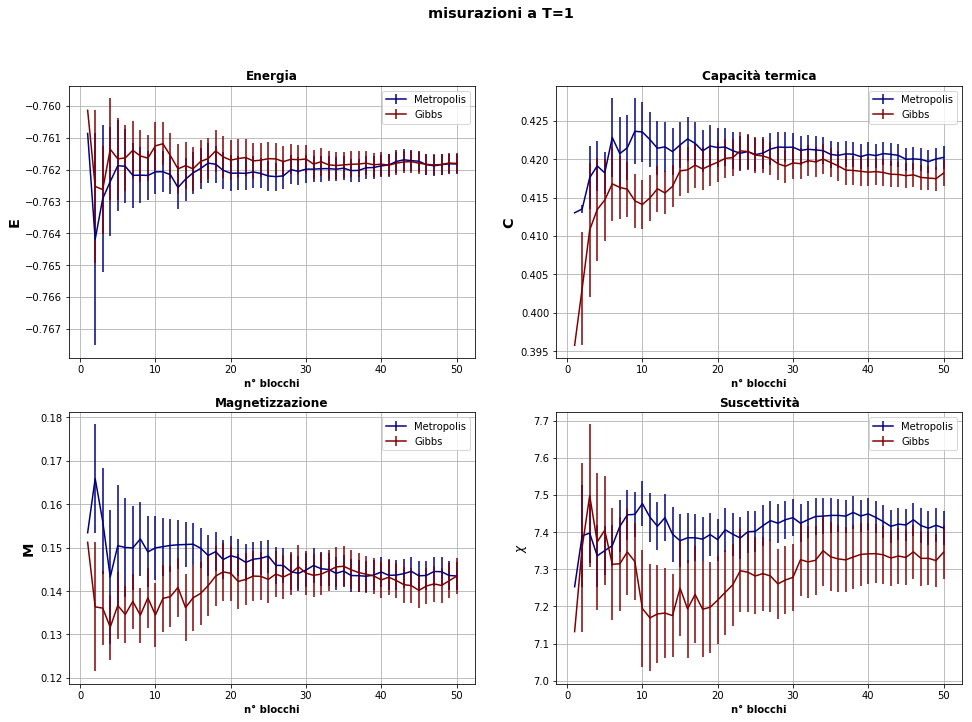

In [3]:
plt.figure(figsize=(16, 11))
plt.suptitle("misurazioni a T=1",size='x-large', weight='bold')
plt.subplot(221)
plt.errorbar(x=xem,y=en_m,yerr=en_m_err,label='Metropolis', color="navy")
plt.errorbar(x=xeg,y=en_g,yerr=en_g_err, label='Gibbs',color="maroon")
plt.xlabel('n° blocchi', weight='bold')
plt.ylabel('E',size='x-large', weight='bold')
plt.title('Energia',size='large', weight='bold')
plt.grid(True)
plt.legend()
#plt.xlim(99,101)


plt.subplot(222)
plt.errorbar(x=xcm,y=cal_m,yerr=cal_m_err,label='Metropolis', color="navy")
plt.errorbar(x=xcg,y=cal_g,yerr=cal_g_err, label='Gibbs',color="maroon")
plt.xlabel('n° blocchi', weight='bold')
plt.ylabel('C',size='x-large', weight='bold')
plt.title('Capacità termica',size='large', weight='bold')
plt.grid(True)
plt.legend()
#plt.xlim(99,101)



plt.subplot(223)
plt.errorbar(x=xmm,y=m_m,yerr=m_m_err,label='Metropolis', color="navy")
plt.errorbar(x=xmg,y=m_g,yerr=m_g_err, label='Gibbs',color="maroon")
plt.xlabel('n° blocchi', weight='bold')
plt.ylabel('M',size='x-large', weight='bold')
plt.title('Magnetizzazione',size='large', weight='bold')
plt.grid(True)
plt.legend()
#plt.xlim(99,101)


plt.subplot(224)
plt.errorbar(x=xxm,y=x_m,yerr=x_m_err,label='Metropolis', color="navy")
plt.errorbar(x=xxg,y=x_g,yerr=x_g_err, label='Gibbs',color="maroon")
plt.xlabel('n° blocchi', weight='bold')
plt.ylabel('$\chi$',size='large', weight='bold')
plt.title('Suscettività',size='large', weight='bold')
plt.grid(True)
plt.legend()
#plt.xlim(99,101)


I risultati sono conformi alle nostre aspettative. 

Pertanto procediamo ad eseguire l'algoritmo per temperature diverse, nel range $[0.5,2]$.

### Energia Interna
Iniziamo con il confrontare l'energia interna calcolata analiticamente con quella risultante dall'algoritmo di Metropolis

In [4]:
# codice per importare l'ultimo elemento della catena di data blocking dai file di output, insieme al relativo errore e usarlo per i grafici
e_m=[]
er_m=[]
a_m=[]
b_m=[]
e_g=[]
er_g=[]
a_g=[]
b_g=[]
tt=["0.500000","0.600000","0.700000","0.900000","1.200000","1.400000","1.600000","1.800000","2.000000"]
l=0
p=[]
pp=[]

l=0
for j in tt:
        p, pp=np.loadtxt("ISING_1D/temp/output"+j+"_metro.ene.0", usecols=(2,3),unpack=True)
        e_m.append(p)
        er_m.append(pp)
        a_m.append(e_m[l][49])
        b_m.append(er_m[l][49])
        p, pp=np.loadtxt("ISING_1D/temp/output"+j+"_gibbs.ene.0", usecols=(2,3),unpack=True)
        e_g.append(p)
        er_g.append(pp)
        a_g.append(e_g[l][49])
        b_g.append(er_g[l][49])
        l=l+1


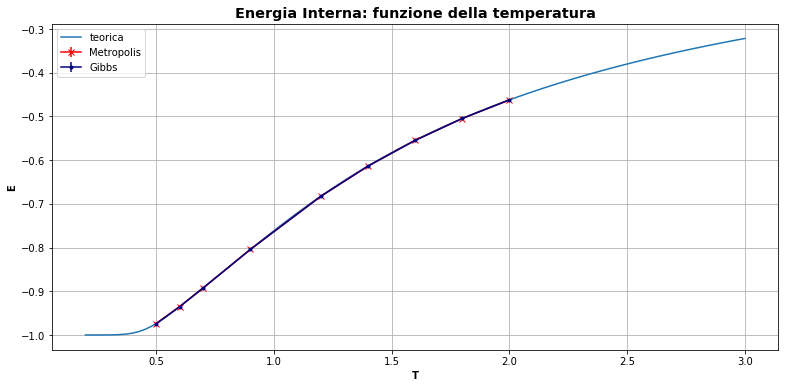

In [5]:
plt.figure(figsize=(13,6))

points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e,label="teorica")
plt.errorbar(x=[0.5,0.6,0.7,0.9,1.2,1.4,1.6,1.8,2],y=a_m,yerr=b_m,marker = 'x',label="Metropolis",color="red")
plt.errorbar(x=[0.5,0.6,0.7,0.9,1.2,1.4,1.6,1.8,2],y=a_g,yerr=b_g,marker = '.',label="Gibbs",color="navy")
plt.title('Energia Interna: funzione della temperatura', weight="bold", size="x-large")
plt.xlabel('T' ,weight="bold")
plt.grid(True)
plt.legend()
plt.ylabel('E', weight="bold")
plt.show()


### Capacità termica

Facciamo la stessa cosa per la capacità termica

In [6]:
e_m=[]
er_m=[]
a_m=[]
b_m=[]
e_g=[]
er_g=[]
a_g=[]
b_g=[]
tt=["0.500000","0.600000","0.700000","0.900000","1.200000","1.400000","1.600000","1.800000","2.000000"]
l=0
p=[]
pp=[]

l=0
for j in tt:
        p, pp=np.loadtxt("ISING_1D/temp/output"+j+"_metro.Cal.0", usecols=(2,3),unpack=True)
        e_m.append(p)
        er_m.append(pp)
        a_m.append(e_m[l][49])
        b_m.append(er_m[l][49])
        p, pp=np.loadtxt("ISING_1D/temp/output"+j+"_gibbs.Cal.0", usecols=(2,3),unpack=True)
        e_g.append(p)
        er_g.append(pp)
        a_g.append(e_g[l][49])
        b_g.append(er_g[l][49])
        l=l+1

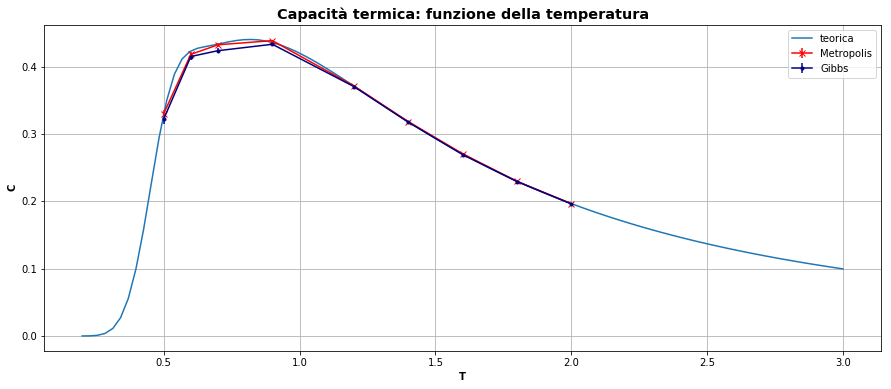

In [7]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.figure(figsize=(15,6))

plt.plot(T, heat,label="teorica")
plt.errorbar(x=[0.5,0.6,0.7,0.9,1.2,1.4,1.6,1.8,2],y=a_m,yerr=b_m,marker = 'x',label="Metropolis",color="red")
plt.errorbar(x=[0.5,0.6,0.7,0.9,1.2,1.4,1.6,1.8,2],y=a_g,yerr=b_g,marker = '.',label="Gibbs",color="navy")
plt.title('Capacità termica: funzione della temperatura', weight="bold", size="x-large")
plt.xlabel('T' ,weight="bold")
plt.ylabel('C', weight="bold")
plt.legend()
plt.grid(True)
plt.show()



# Magnetizzazione

E per la magnetizzazione.

In [8]:
e_m=[]
er_m=[]
a_m=[]
b_m=[]
e_g=[]
er_g=[]
a_g=[]
b_g=[]
tt=["0.500000","0.600000","0.700000","0.900000","1.200000","1.400000","1.600000","1.800000","2.000000"]
l=0
p=[]
pp=[]

l=0
for j in tt:
        p, pp=np.loadtxt("ISING_1D/temp/output"+j+"_metro.Magn.0", usecols=(2,3),unpack=True)
        e_m.append(p)
        er_m.append(pp)
        a_m.append(e_m[l][49])
        b_m.append(er_m[l][49])
        p, pp=np.loadtxt("ISING_1D/temp/output"+j+"_gibbs.Magn.0", usecols=(2,3),unpack=True)
        e_g.append(p)
        er_g.append(pp)
        a_g.append(e_g[l][49])
        b_g.append(er_g[l][49])
        l=l+1

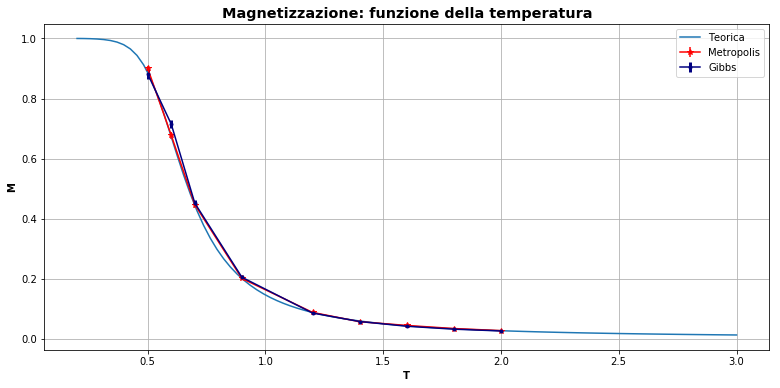

In [9]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.figure(figsize=(13,6))

plt.plot(T, M,label="Teorica")
plt.errorbar(x=[0.5,0.6,0.7,0.9,1.2,1.4,1.6,1.8,2],y=a_m,yerr=b_m,marker = '*',label="Metropolis",color="red")
plt.errorbar(x=[0.5,0.6,0.7,0.9,1.2,1.4,1.6,1.8,2],y=a_g,yerr=b_g,marker = '.', elinewidth = 3.,label="Gibbs",color="navy")
plt.title('Magnetizzazione: funzione della temperatura', weight="bold", size="x-large")
plt.xlabel('T' ,weight="bold")
plt.ylabel('M', weight="bold")
plt.legend()
plt.grid(True)
plt.show()

### Suscettività
E infine per la suscettività.

In [10]:
e_m=[]
er_m=[]
a_m=[]
b_m=[]
e_g=[]
er_g=[]
a_g=[]
b_g=[]
tt=["0.500000","0.600000","0.700000","0.900000","1.200000","1.400000","1.600000","1.800000","2.000000"]
l=0
p=[]
pp=[]

l=0
for j in tt:
        p, pp=np.loadtxt("ISING_1D/temp/output"+j+"_metro.Susx.0", usecols=(2,3),unpack=True)
        e_m.append(p)
        er_m.append(pp)
        a_m.append(e_m[l][49])
        b_m.append(er_m[l][49])
        p, pp=np.loadtxt("ISING_1D/temp/output"+j+"_gibbs.Susx.0", usecols=(2,3),unpack=True)
        e_g.append(p)
        er_g.append(pp)
        a_g.append(e_g[l][49])
        b_g.append(er_g[l][49])
        l=l+1

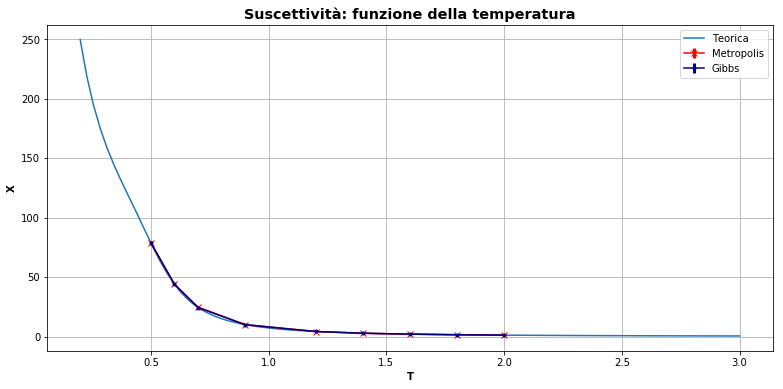

In [11]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.figure(figsize=(13,6))
plt.plot(T, X,label="Teorica")
plt.errorbar(x=[0.5,0.6,0.7,0.9,1.2,1.4,1.6,1.8,2],y=a_m,yerr=b_m,marker = 'x', elinewidth = 3.,label="Metropolis",color="red")
plt.errorbar(x=[0.5,0.6,0.7,0.9,1.2,1.4,1.6,1.8,2],y=a_g,yerr=b_g,marker = '.', elinewidth = 3.,label="Gibbs",color="navy")
plt.title('Suscettività: funzione della temperatura', weight="bold", size="x-large")
plt.xlabel('T' ,weight="bold")
plt.ylabel('X', weight="bold")
plt.legend()
plt.grid(True)
plt.show()

La convergenza di entrambi gli algoritmi al valore teorico è molto buono per tutte le grandezze in gioco: l'unica differenza sostanziale si può vedere per poche temperature nella capacità termica, dove l'algoritmo di metropolis funziona meglio di quello di Gibbs.